## Imports

In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from matplotlib.pyplot import figure

## Loading the data

In [2]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [4]:
s = x_train.shape

In [5]:
xT = x_train.reshape(-1, s[1]*s[1])
xt = x_test.reshape(-1, s[1]*s[1])

## Auxillary methods

### Get picture of the given number

Number is :  1


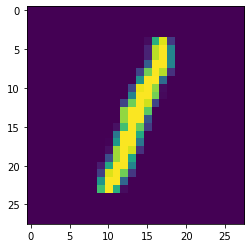

In [6]:
def showImage(num):
    plt.imshow(num)

n = int(random.random()*len(x_train))
showImage(x_train[n])
print("Number is : ", y_train[n])

### Distribution of samples in the given data

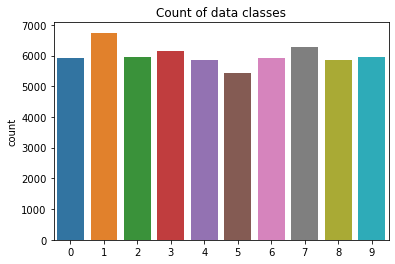

In [7]:
def getDist(y):
    ax = sns.countplot(y)
    ax.set(title="Count of data classes")
    
getDist(y_train)

### Get a dataset based on sample numbers

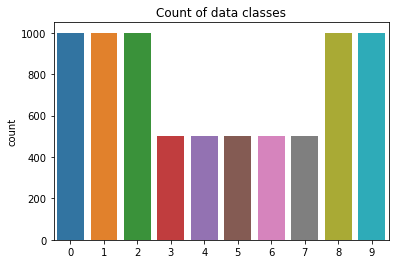

In [8]:
def getData(dist, x, y):
    
    dx = []
    dy = []
    counts = [0 for i in range(10)]
    for i in range(len(x)):
        if counts[y[i]]<dist[y[i]]:
            dx.append(x[i])
            dy.append(y[i])
            counts[y[i]] += 1
        
    return np.array(dx), np.array(dy)

dist = [1000, 1000, 1000, 500, 500, 500, 500, 500, 1000, 1000]
x1, y1 = getData(dist, xT, y_train)
getDist(y1)

### Get misclassification based graph original and predictions

In [9]:
def pred_graph(test, pred):
    misses = []
    for i in range(len(test)):
        if test[i]!=pred[i]:
            misses.append(test[i])
    
    ax = sns.countplot(misses)
    ax.set(title="Count of misclassifications")

### A full classification test method

In [10]:
def testMethod(dist, x, y):
    x1, y1 = getData(dist, x, y)
    plt.subplot(2,1,1)
    getDist(y1)
    c = RandomForestClassifier()
    c.fit(x1, y1)
    pred = c.predict(xt)
    print("Accuracy score : ", c.score(xt, y_test))
    plt.subplot(2,1,2)
    pred_graph(y_test, pred)

## Ideal Case

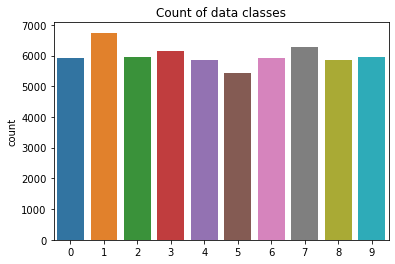

In [11]:
getDist(y_train)

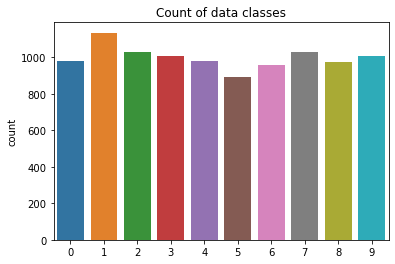

In [12]:
getDist(y_test)

Accuracy score :  0.9714


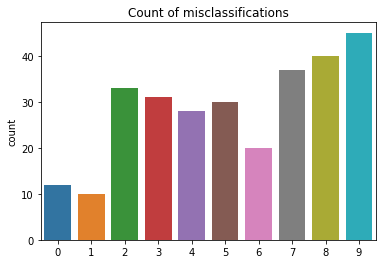

In [13]:
c1 = RandomForestClassifier()
c1.fit(xT, y_train)
pred = c1.predict(xt)

print("Accuracy score : ", c1.score(xt, y_test))
pred_graph(y_test, pred)

## Tests

In [14]:
sns.set(rc={'figure.figsize':(8,12)})

In [15]:
dist1 = [4000, 4000, 4000, 3000, 100, 200, 50, 50, 4000, 50]
dist2 = [500, 4000, 100, 100, 100, 200, 50, 5000, 4000, 600]
dist3 = [500, 10, 50, 3000, 2000, 2000, 5000, 50, 4000, 50]
dist4 = [4000, 3200, 2700, 350, 200, 300, 250, 200, 1800, 2700]

Accuracy score :  0.6368


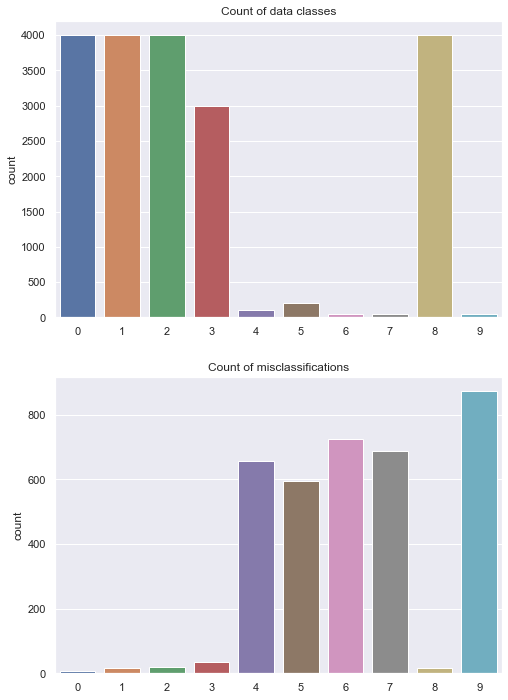

In [16]:
testMethod(dist1, xT, y_train)

Accuracy score :  0.659


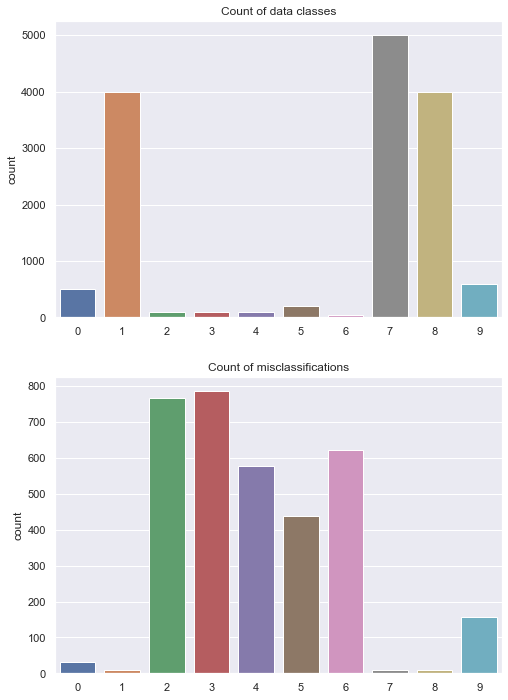

In [17]:
testMethod(dist2, xT, y_train)

Accuracy score :  0.6177


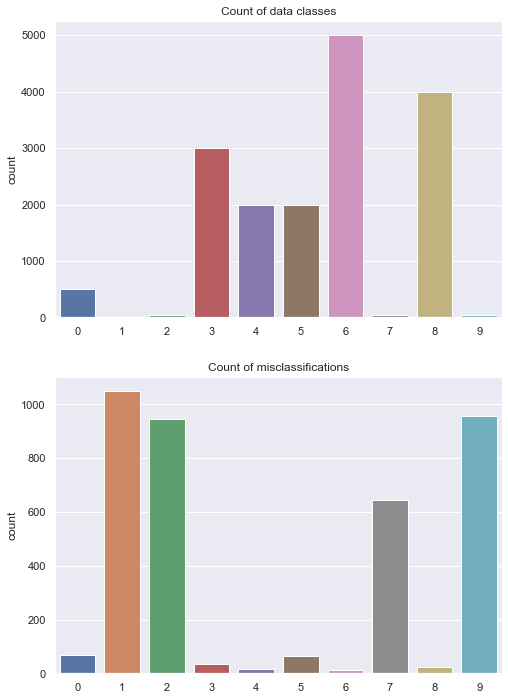

In [18]:
testMethod(dist3, xT, y_train)

Accuracy score :  0.8375


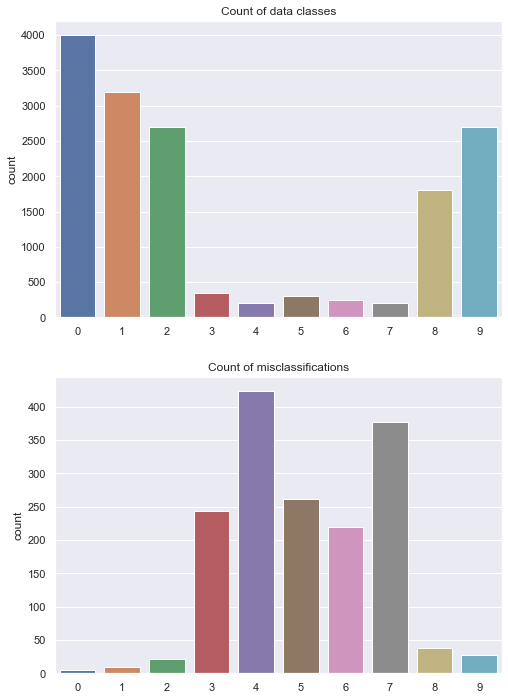

In [19]:
testMethod(dist4, xT, y_train)